In [1]:
import sys
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# To get functions to plot the band structure and hamiltonian
sys.path.append("../../../")
from periodiclas.tools.util import LASdata

In [2]:
# BNL* Reference values
BNLIP = -5.87
BNLEA =  -2.60

In [3]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# SI-Fig 11

In [4]:
def getBand(nCfrag, nCT, pct_pdft=0):
    '''
    A list containing energy in au
    in this order: N, Ionized, EA
    '''
    
    pklfile =  f'./PAChain.{nCfrag}.{nCT}.pkl'
    
    lasdata = LASdata(pkl_fn=pklfile, pct_pdft=pct_pdft)
    
    homo_e = lasdata.get_homo()[0]
    lumo_e = lasdata.get_lumo()[0]
 
    IP = - max(homo_e)
    EA = - min(lumo_e)
    
    BandGap = IP-EA
    
    return IP, EA, BandGap

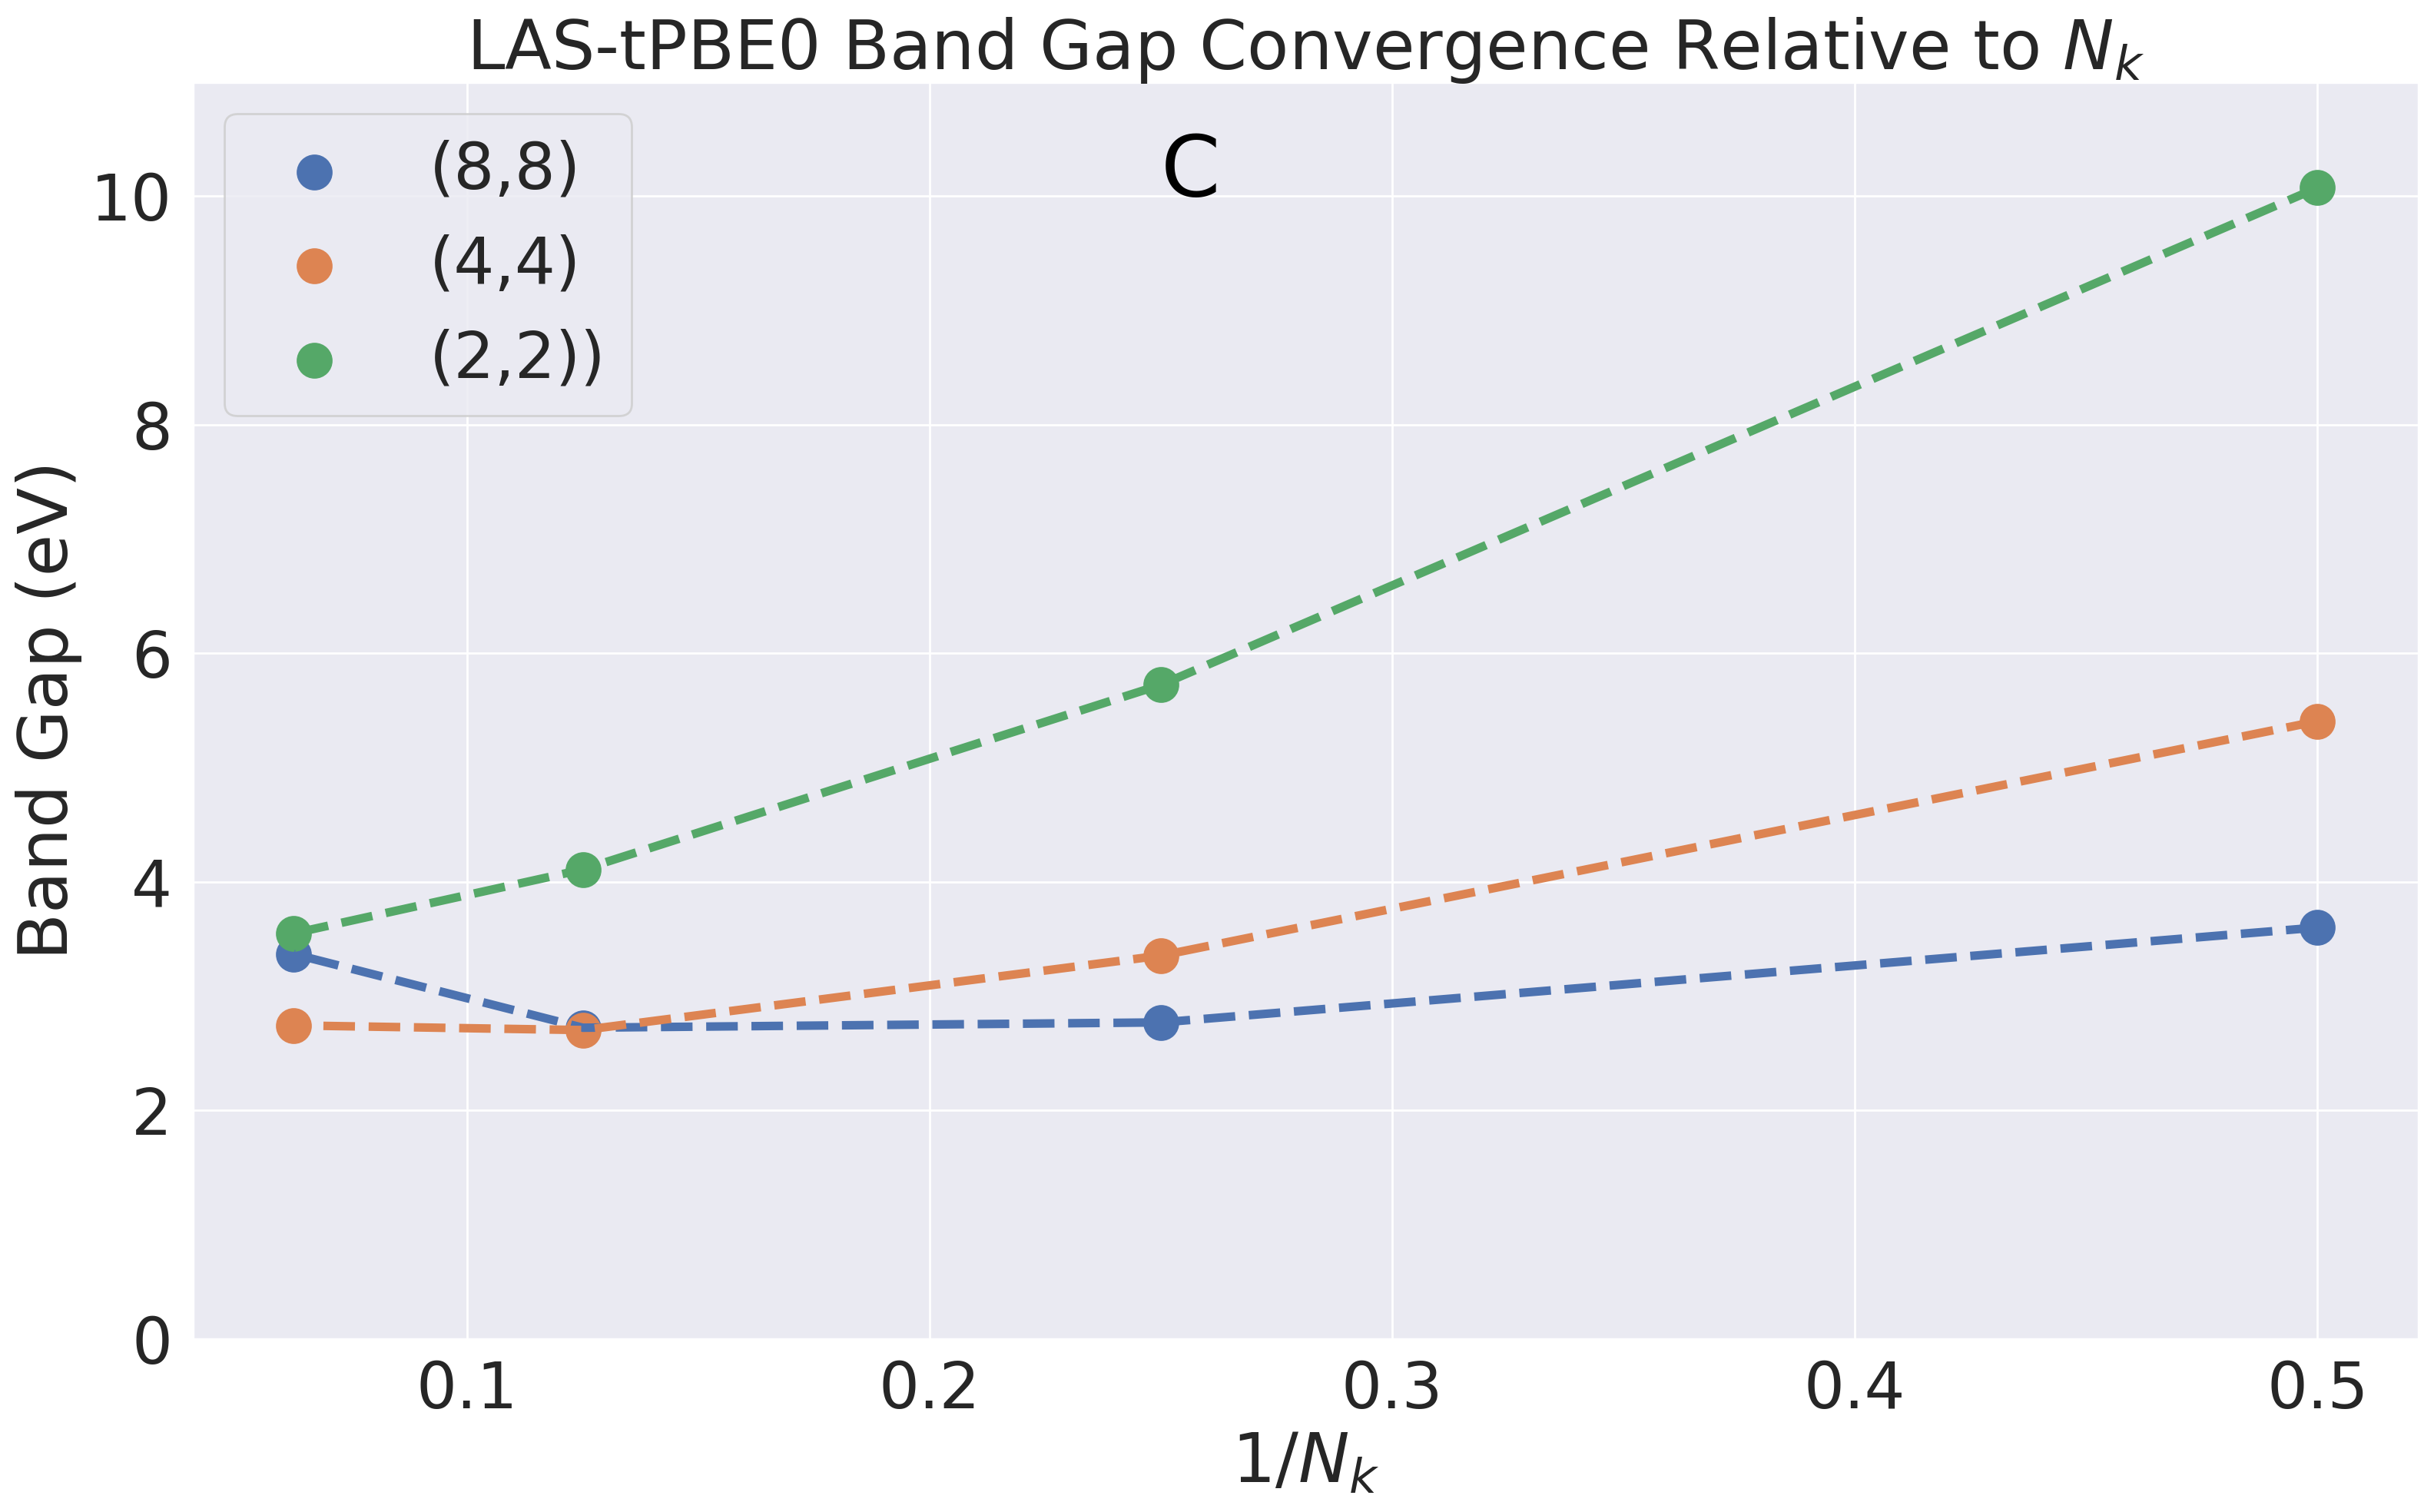

In [5]:
nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
sns.set()
plt.figure()
plt.scatter(1/nk, bandgap, label='(8,8)',s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0.75)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2))', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LAS-tPBE0 Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 11)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.legend(loc='best', fontsize=30)
plt.annotate("C",(0.25, 10),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLAStPBE0withKpoints.png', dpi=dpi)
# plt.close()

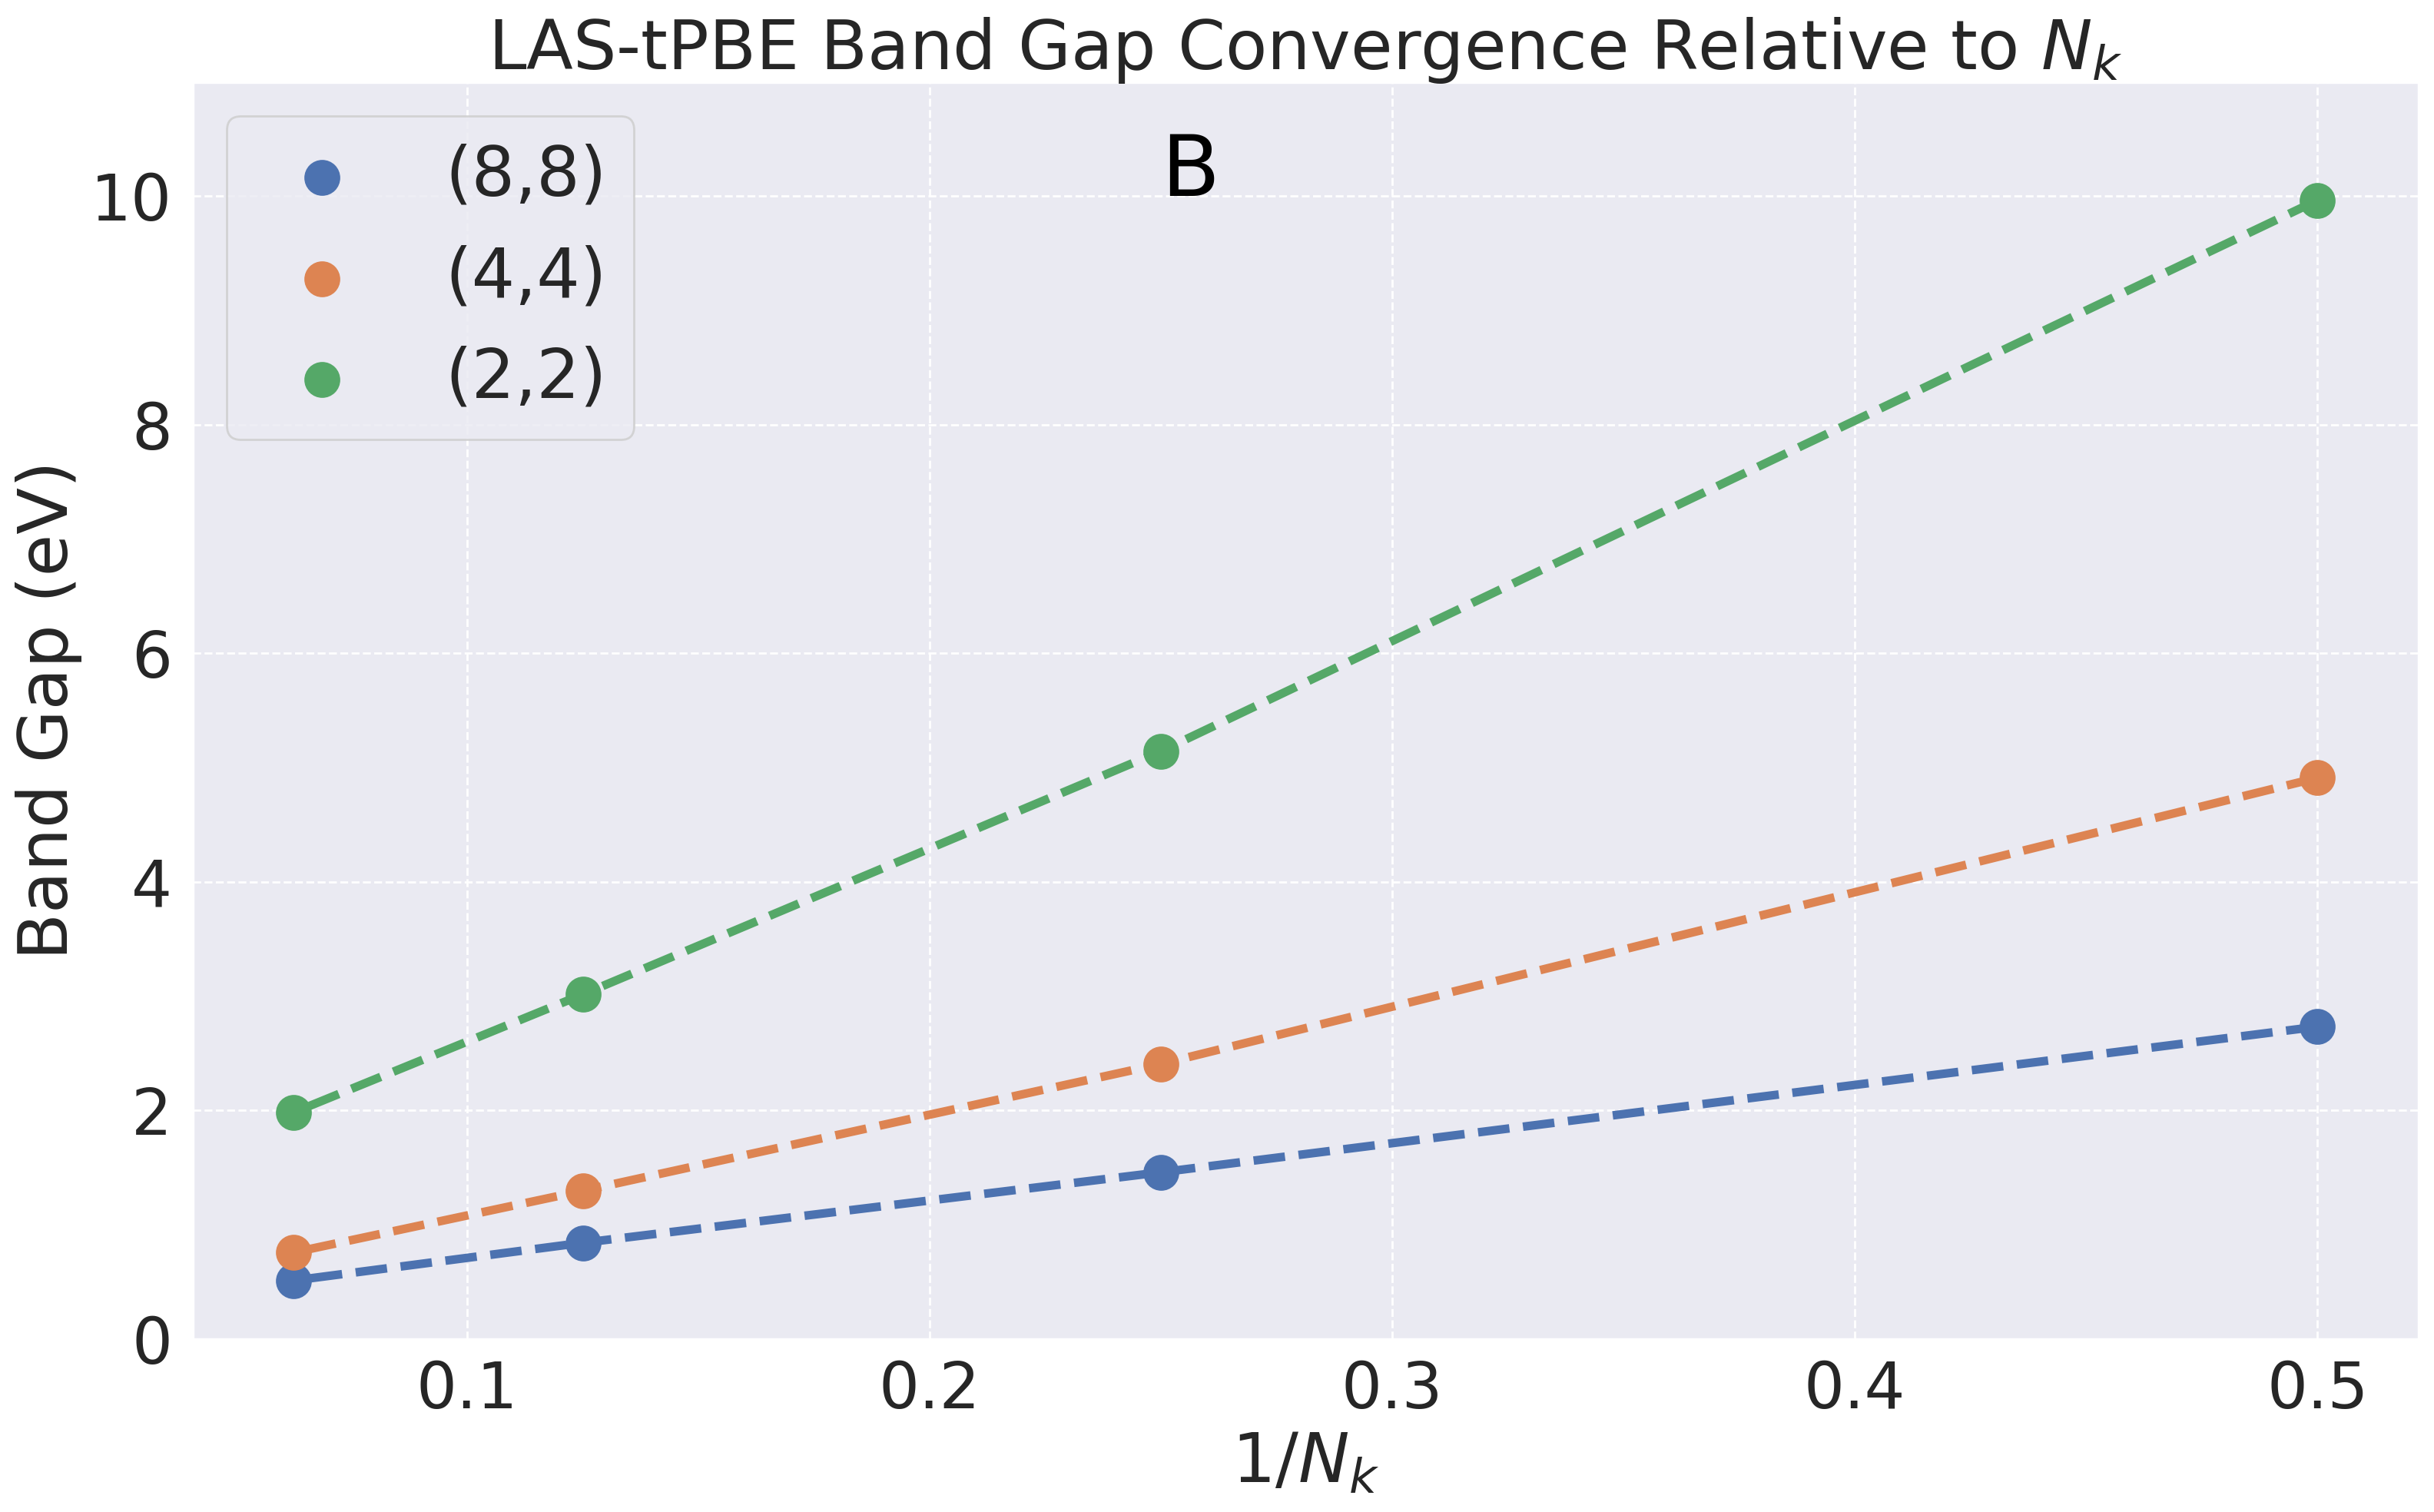

In [6]:
# LAS-tPBE
plt.figure()
sns.set()
nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]

plt.scatter(1/nk, bandgap, label='(8,8)', s=250)
plt.plot(1/nk, bandgap, linestyle='--',linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=1)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LAS-tPBE Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 11)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.tight_layout()
plt.grid(True, linestyle='--')
plt.legend(loc='best', fontsize=32)
plt.annotate("B",(0.25, 10),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLAStPBEwithKpoints.png', dpi=dpi)
# plt.close()

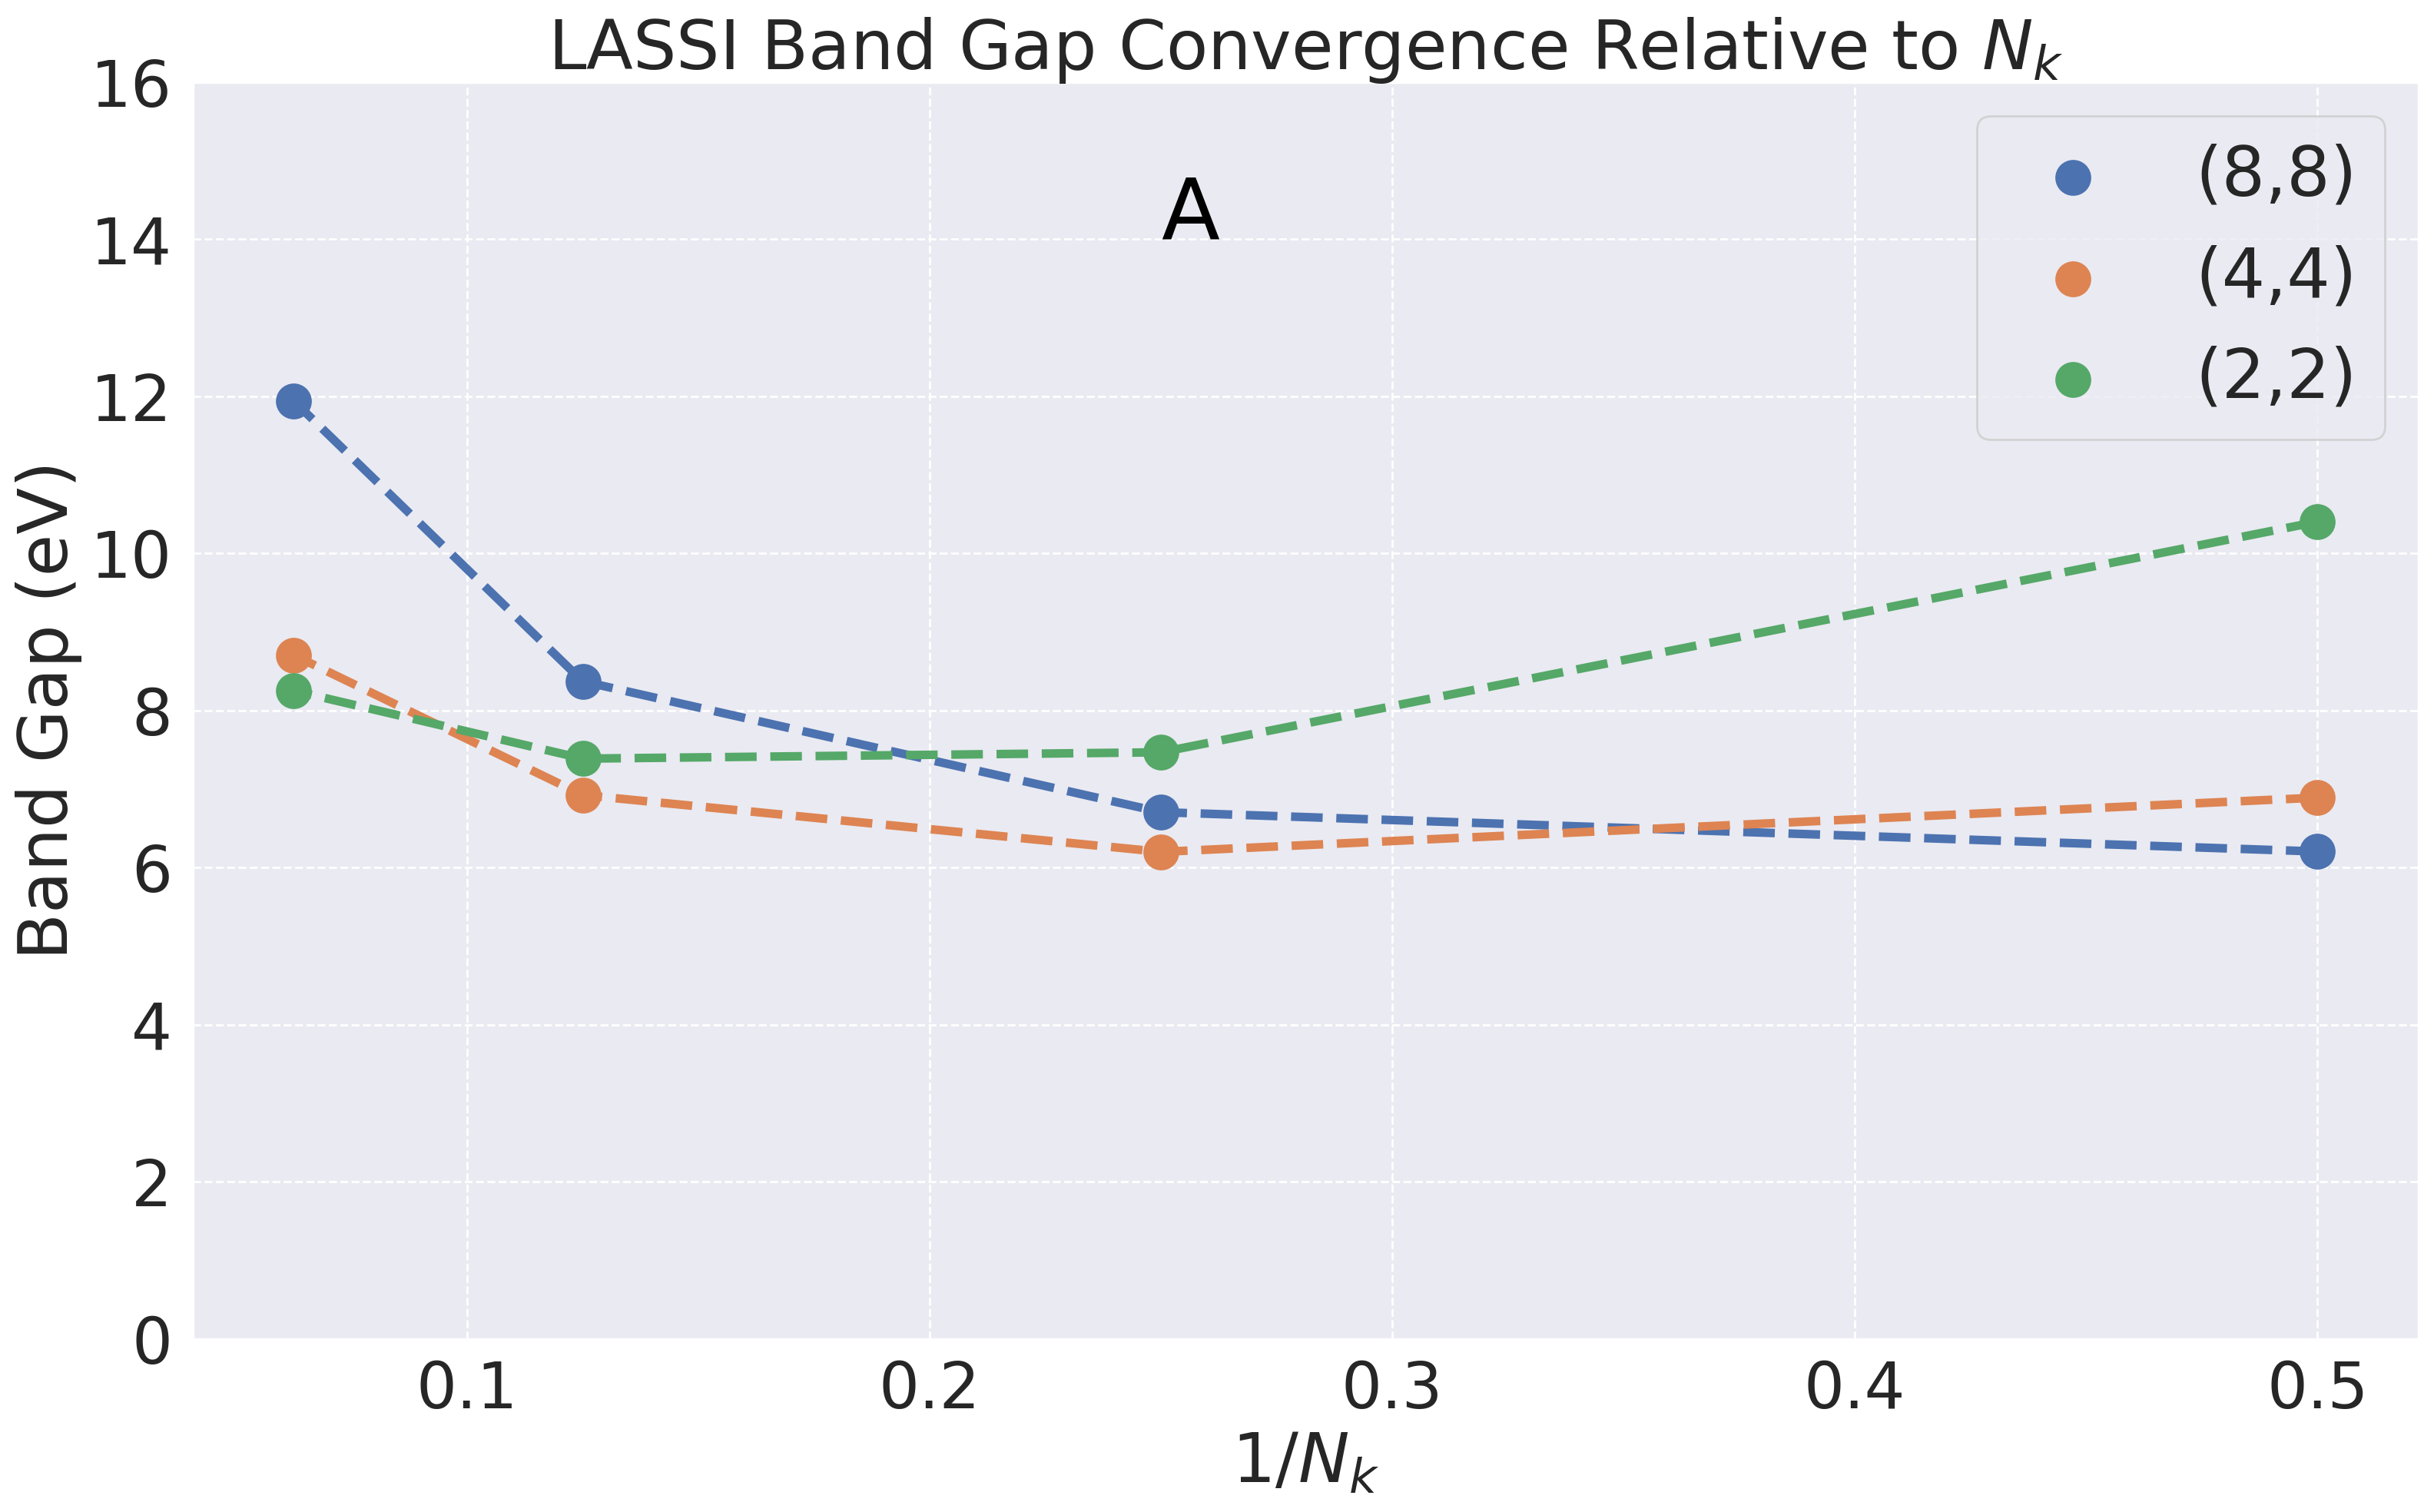

In [7]:
# LAS Band Gap

nCT = [16, 32, 64, 128]
nCfrag = 8
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
sns.set()
plt.figure()
plt.scatter(1/nk, bandgap, label='(8,8)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [8, 16, 32, 64]
nCfrag = 4
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(4,4)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)


nCT = [4, 8, 16, 32]
nCfrag = 2
nk = np.array([int(x/nCfrag) for x in nCT])
bandgap = [getBand(nCfrag, nC, pct_pdft=0)[-1] for nC in nCT]
plt.scatter(1/nk, bandgap, label='(2,2)', s=250)
plt.plot(1/nk, bandgap, linestyle='--', linewidth=4)

plt.title('LASSI Band Gap Convergence Relative to $N_k$',fontsize=32)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 16)
plt.ylabel("Band Gap (eV)",fontsize=32)
plt.xlabel(r"$1/N_{k}$",fontsize=32)
plt.tight_layout()
plt.grid(True, linestyle='--')
plt.legend(loc='upper right', fontsize=32)
plt.annotate("A",(0.25, 14),c='black',size=40)
plt.tight_layout()
plt.savefig('PABandGapConvergenceforLASwithKpoints.png', dpi=dpi)
# plt.close()